# Motivation
I like Noita. I find it relaxing and challenging. I found out about the puzzle via **FuryForged** on YouTube. They reference a *googledocs* document maintained by **xkeeper** that summarizes the collective efforts of other Noita players on this matter.

Most of these attempts go nowhere but such is the nature of research. Perhaps one of these branches will ring a bell in somebody's head in a way I couldn't have anticipated. I'm proposing 3 different interpretations but I only tried a handful of variations. Maybe -out of the chaos- we'll hit the right combination of ideas.

Do what you want with this code. Can you connect it with the pam5 insight? Contact me at jpalacios.barreda@gmail.com for questions.

Peace, Jose. (December, 2022) 

# Assumptions

* Individual glyphs represent a 5-state code
* The messages were correctly transcribed from the game to the googledocs document
* 5 means newline and it can be ignored

## Python libraries you'll need

* <code>pandas, plotly, matplotlib, pyaudio</code>

# Messages and description of data

In [64]:
messages = {
    'East 1' : ['201013223304041130232114313033004024000',
                '032041220001422242122220110003201341113',
                '310221044000200104040144142033022034241',
                '231313130031132120142231331441341441211',
                '014003212114130041110100241241004031001',
                '040331432341122101010040120412442442402',
                '13331220330103113111211210322314',
                '1310424224130304110203123204313'],
    
    'West 1' : ['311013223304041130232114313033004024004',
                '032041220001422242122220110003201341101',
                '020201044000104044040144142033022034131',
                '111213130001102020142231331441341441401',
                '212223303244000243231110221231031022043',
                '403431401222111340210301413341221330132',
                '02414221422203024200123212402323201403',
                '3101322112130203222200422310313224113'],

    'East 2' : ['121013223304041130232114313033004024004',
                '132041220001422242122220110003201341132',
                '302013230044210143001214140311024104223',
                '102441113222231403330130231010322441422',
                '014113030144102020311114241034232132112',
                '141120120040103022122402040000103221040',
                '001132210042231043242013103010200300221',
                '020142240312031330231000103310441201422',
                '034201043101100200124',
                '131402022020141322311'],

    'West 2' : ['301014304231111130103200114211142042144',
                '132041002441200222141013240022220120402',
                '110120210044012022014100202130013243312',
                '401130112010322313431422313213031100003',
                '143110223024224201021223142200103111223',
                '203401230041222213132220230242140211440',
                '122201000012143101233312010224203221',
                '011010101321231103032030241320322030'],
    
    'East 3' : ['221014304000100302220231222232144144211',
                '332041002222431341003242000010220042431',
                '313223312120134004141302310001231043130',
                '020020140002021212311100003112220110032',
                '140214222023042001214241211223104010034',
                '003021031300212210310000312332003240422',
                '001240241020232043043031224131312301142',
                '232311130211021020222341412113240321230',
                '001030124221224033003211024213133231001',
                '410210103300432031412111422330403400041',
                '04124012304',
                '0423010104'],

    'West 3' : ['111014304044023101033232120113240032023',
                '432041002342120301441212222401420211130',
                '033031134224144111303003142234042131112',
                '431413200210141202112431230203111430021',
                '103133214200230011143034143033110122120',
                '101132211120442310131321231020311022200',
                '120120123130011024014133021023002220044',
                '210312220001440122003232142141332131220',
                '120224022234203033120244040200',
                '002121100141102242103402411442'],
    
    'East 4' : ['101014304000100000010213233120142133003',
                '232041002222431212430430300110203421130',
                '101004223210034300144214224022200300022',
                '303411022313202403302030222441142010141',
                '143234300120242230110301302001040030130',
                '012332401341341302441301412412222303322',
                '212222143130302013102113102230003103232',
                '432331411032403200122103112431440120231',
                '12202423010131123221303',
                '3421210220100323034034'],

    'West 4' : ['301014304000100000010213233120140040002',
                '232041002222431212430430300110222113142',
                '211310214001032122241124300100131223313',
                '030221230132301430413420300032332421140',
                '040210240103202210243021012103012033232',
                '402211103132412102142440311122021431141',
                '204233241203302023301041204241012232101',
                '311140311421232122410240132440030221440',
                '224314114042121114140130',
                '020231000031000102140011'],
    
    'East 5' : ['111014304000100000010213233120143044133',
                '332041002222431212430430300110211112430',
                '101214223302024014144212222230212213233',
                '303411022401202041302002242420240341202',
                '014110114103111010240110204010013100130',
                '211211130110441211112403410122040041213',
                '102041041221134130133013243011042010221',
                '020203002240010120442311042111142031102',
                '131224220222041',
                '232442101331431']
}

In [65]:
import pandas as pd

# Ignore last two lines: meta data?
data = { key : [int(c) for row in messages[key][:-2] for c in row] for key in messages }

df = pd.DataFrame()
all_keys = messages.keys()
df['location'] = [k for k in all_keys]
df['totalLength'] = [len(data[k]) for k in all_keys]
df['checksum'] = [sum(data[k]) for k in all_keys]
df['checksum5'] = [sum(data[k]) % 5 for k in all_keys]
df['lines'] = [len(messages[k]) for k in all_keys]
df['linesMinus2'] = [len(messages[k])-2 for k in all_keys]
df['lineLen'] = [len(messages[k][0]) for k in all_keys]
df['msgLen'] = df['lineLen']*df['linesMinus2']
df['msgLenMult2'] = df['msgLen'].apply(lambda e: (e % 2) == 0)
df['msgLenMult3'] = df['msgLen'].apply(lambda e: (e % 3) == 0)
df['lineM1'] = [len(messages[k][-1]) for k in all_keys]
df['lineM2'] = [len(messages[k][-2]) for k in all_keys]

display(df.sort_values('totalLength'))
display(df.sort_values('checksum5'))

,location,totalLength,checksum,checksum5,lines,linesMinus2,lineLen,msgLen,msgLenMult2,msgLenMult3,lineM1,lineM2
0,East 1,234,405,0,8,6,39,234,True,True,31,32
1,West 1,234,415,0,8,6,39,234,True,True,37,38
3,West 2,234,390,0,8,6,39,234,True,True,36,36
2,East 2,312,522,2,10,8,39,312,True,True,21,21
5,West 3,312,532,2,10,8,39,312,True,True,30,30
6,East 4,312,530,0,10,8,39,312,True,True,22,23
7,West 4,312,527,2,10,8,39,312,True,True,24,24
8,East 5,312,499,4,10,8,39,312,True,True,15,15
4,East 3,390,640,0,12,10,39,390,True,True,10,11


,location,totalLength,checksum,checksum5,lines,linesMinus2,lineLen,msgLen,msgLenMult2,msgLenMult3,lineM1,lineM2
0,East 1,234,405,0,8,6,39,234,True,True,31,32
1,West 1,234,415,0,8,6,39,234,True,True,37,38
3,West 2,234,390,0,8,6,39,234,True,True,36,36
4,East 3,390,640,0,12,10,39,390,True,True,10,11
6,East 4,312,530,0,10,8,39,312,True,True,22,23
2,East 2,312,522,2,10,8,39,312,True,True,21,21
5,West 3,312,532,2,10,8,39,312,True,True,30,30
7,West 4,312,527,2,10,8,39,312,True,True,24,24
8,East 5,312,499,4,10,8,39,312,True,True,15,15


# Attempt: messages are text

## Histogram of individual frequencies

In [60]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=3, subplot_titles=[k for k in messages.keys()])
colors = ['#64007d', '#ffe5ae']

for i,key in enumerate(messages.keys()):
    fig.add_trace(
        go.Histogram(
            x=data[key],
            histnorm='probability',
            name=f'{key}',
            marker=dict(color=colors[0] if key.startswith('East') else colors[1]),
            xbins=go.histogram.XBins(start=-0.5, end=4.5)
        ),
        row=int(i/3)+1, col=int(i%3)+1
    )

for ax in fig['layout']:
    if ax[:5]=='xaxis':
        fig['layout'][ax]['range'] = [-0.5, 4.5]
    if ax[:5]=='yaxis':
        fig['layout'][ax]['range'] = [0, 0.4]

fig.update_traces(marker_line_width=1,marker_line_color='white')
fig.update_layout(
    height=650, 
    width=700, 
    legend_title='Location',
    title_text='<b>Histogram of states per message</b>',
    font=dict(size=14)
)

fig.update_layout(showlegend=False)
fig.show()

## Frequency of letters in Finnish and English

Data taken from https://www.sttmedia.com/characterfrequency-finnish and https://www.sttmedia.com/characterfrequency-english, Accessed in December 2022. Chart made in plotly chart sutdio.

![Frequency of letters in Finnish and English](freq_letters.png)

## Codec: 3 digit wordsize in base5 (L to R)

$d_1 5^2 + d_2 5^1 + d_3 5^0 = \mbox{[Number in base10]}$

In [61]:
fromBase5 = lambda strNum: sum([int(d)*5**(len(strNum)-1-i) for i,d in enumerate(strNum)])
base5textLR = { k : [f'{d1}{d2}{d3}' for i,(d1,d2,d3) in enumerate(zip(data[k][0:], 
                                                                       data[k][1:], 
                                                                       data[k][2:])) if (i % 3) == 0] for k in all_keys }
base5textRL = { k : [f'{d3}{d2}{d2}' for i,(d1,d2,d3) in enumerate(zip(data[k][0:], 
                                                                       data[k][1:], 
                                                                       data[k][2:])) if (i % 3) == 0] for k in all_keys }

showChars = 40
offset = 32
print('>> base5TextLR')
for msg in [''.join([chr(fromBase5(c) + offset) for c in base5textLR[k]]) for k in all_keys]:
    print(msg.encode('utf8')[:showChars])
print('')

print('>> base5TextRL')
for msg in [''.join([chr(fromBase5(c) + offset) for c in base5textRL[k]]) for k in all_keys]:
    print(msg.encode('utf8')[:showChars])
print('')

>> base5TextLR
b'S(_o5HcBs2$. 15\\!\xc2\x90hE\\>#S\xc2\x80Ap]8 R=4QO2,3'
b'q(_o5HcBs2$.$15\\!\xc2\x90hE\\>#S\xc2\x80:*S8 =84QO2,3'
b'D(_o5HcBs2$.$J5\\!\xc2\x90hE\\>#S\xc2\x80Jm(a8WP![Mq.='
b'l)ob?H<RBXO6QJ5"\xc2\x99R^N(f,\\C\xc2\x86>CW8\',)9TH(i'
b'])o 9m\\b^cQQX|5"^\xc2\x94\xc2\x80#h %\\6\xc2\x94s_rCL$Nmp!b'
b'?)o8-:2cCAf1-\xc2\x955"\xc2\x81Cl\xc2\x99Y^\xc2\x85\xc2\x8eXH20L`Q?n#O'
b':)o 9 %ZdCOK#c5"^\xc2\x94Y\xc2\x93\xc2\x93k>U\xc2\x8fH:$_W3kQ[`,'
b'l)o 9 %ZdCM4"c5"^\xc2\x94Y\xc2\x93\xc2\x93k>^AOXp[!1EgGk9I'
b'?)o 9 %ZdCP8K|5"^\xc2\x94Y\xc2\x93\xc2\x93k>X@\xc2\x93:[_m.)QY^a'

>> base5TextRL
b'9qw\xc2\x84Q2d\xc2\x8aq}\xc2\x84\xc2\x90 dQ,9^j^,&k9Qq&E\xc2\x9c  \xc2\x848\xc2'
b'?qw\xc2\x84Q2d\xc2\x8aq}\xc2\x84\xc2\x90\xc2\x84dQ,9^j^,&k9Q9,9\xc2\x9c \xc2\x84\xc2\x9c'
b'Eqw\xc2\x84Q2d\xc2\x8aq}\xc2\x84\xc2\x90\xc2\x84dQ,9^j^,&k9QdRq2\xc2\x9c&\xc2\x839'
b'9\xc2\x8a\xc2\x84K?2k \xc2\x8a?jj\xc2\x9cdQRQ ^Qq8^,,R&,&\xc2\x9cX^\xc2\x8a '
b'E\xc2\x8a\xc2\x84  R,K^d\xc2\x9c\xc2\x9c?dQR^KQkj &,jKqwX,

## Notes about this section

* There is a common pattern or *structure* visible in the messages
* The range of values is quite wide. There might be another encoding layer or this is simply not it (not text)

# Attempt: messages are images

There are multiple ways of generating images from the messages. One straightforward interpretation is that the messages are *drawing instructions* like in that education programming language.

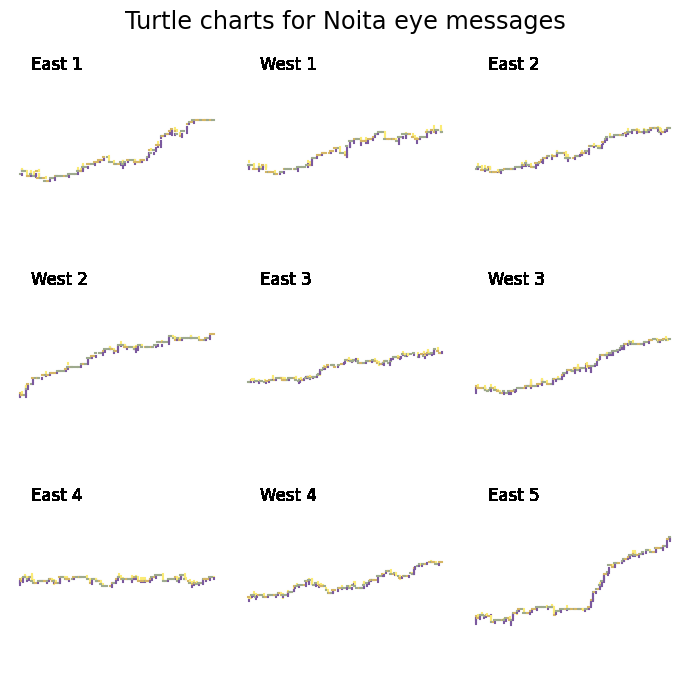

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3,figsize=(7,7))
plt.suptitle('Turtle charts for Noita eye messages', fontsize='xx-large')
colors = ['#000000', '#7b599f', '#9eaa8d', '#fbeb75', '#d5b665']
stroke=0.5
for i,k in enumerate(all_keys):
    cx = 0
    cy = 0
    r = int(i/3)
    c = int(i%3)
    for instr in data[k]:
        ax[r][c].get_yaxis().set_visible(False)
        for spinekey in ['bottom', 'top', 'left', 'right']:
            ax[r][c].spines[spinekey].set_visible(False)
        ax[r][c].get_xaxis().set_visible(False)
        ax[r][c].axis('equal')
        if instr == 0: # ?
            stroke *= -1
        elif instr == 1: # Move up
            ax[r][c].plot([cx, cx], [cy, cy+stroke], color=colors[instr])
            cy += 1
        elif instr == 3: # Move down
            ax[r][c].plot([cx, cx], [cy, cy-stroke], color=colors[instr])
            cy -= 1
        elif instr == 2: # Move right
            ax[r][c].plot([cx, cx+stroke], [cy, cy], color=colors[instr])
            cx += 1
        elif instr == 4: # Move left
            ax[r][c].plot([cx, cx-stroke], [cy, cy], color=colors[instr])
            cx += 1
        ax[r][c].text(0.1, 0.9, f'{k}', transform=ax[r][c].transAxes, fontsize='large')

plt.tight_layout()
plt.show()    

## Notes about this section

* Nothing remarkable about this interpretation
* The last 2 lines were ignored (are they meta-data?)

# Attempt: messages are sounds

A popular structure in music is the so called **pentatonic** scale. The vast majority of blues music revolves around this structure and a handful of chord progressions. This structure was discovered and re-discovered in different cultures and different times. Much like us trying to figure out this eye thing. In the modern musical canon the pentatonic scale is just another structure in their zoo of patterns. The scale's property we're interested in should be obvious by now: it has 5 tones.

If we choose an arbitrary root note (say A4 440Hz) and decide how to establish length of notes we should be able to write an audio codec for this.

* A (0) 
* C (1) 
* D (2) 
* E (3)
* G (4)

Let's take each glyph and play a note from the Am pentatonic scale for 0.5 seconds at a time ignoring the last two lines of each message.

In [67]:
# Idea taken from SO post: 
#    https://stackoverflow.com/questions/9770073/sound-generation-synthesis-with-python
#    Accessed in December 2022
import math
import pyaudio

sample_rate = 16000
sample_length = 0.25

N = int(sample_rate*sample_length)
restframes = N % sample_rate
wavdata = '' 
freq_table = {
    0 : 440,    # A4
    1 : 523.25, # C
    2 : 587.33, # D
    3 : 659.25, # E
    4 : 783.99  # G
}

# Change message key to listen to different "song" 
msgkey = 'East 5'
for c in data[msgkey]:
    for frame in range(N):
        wavdata += chr(int(math.sin(frame/((sample_rate/freq_table[c])/math.pi))*127+128))    

p = pyaudio.PyAudio()
stream = p.open(format=p.get_format_from_width(1), 
                channels=1,
                rate=sample_rate, 
                output=True)

stream.write(wavdata)
stream.stop_stream()
stream.close()
p.terminate()

## Notes about this section

* The isometric samples sound surprisingly musical for a *random* string of whole notes. The power of the pentatonic scale.
* I'd take the bottom 2 lines of each message and check for an indication of the duration of each note. Basically, a rule to update <code>sample_length, N</code> before <code>wavdata</code> gets built.